# E2a: Küchentischversuch zum Laval-Rotor

Name:Jakob Knoblach
Datum:08.01.2024  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: Wie verhält sich die Vibration meines Handys? Wie verhält sich die Vibration der Membran meines Kopfhörers?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="datasheets/Handyvibration.jpg" width="500">

- Beschreibung des Aufbaus: Ich habe den Beschleunigungssensor mit einem straffem Gummiband an meinem Handy befestigt.
- Vorgangsbeschreibung: Nachdem ich den Sensor befistigt habe, wurde eine App geöffnet, mit der man das Handy vibrieren lassen kann. Die App wurde gestartet und kurz dannach auch das Programm auf dem Raspberry Pi.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [22]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [23]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = 'measurement_data/data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration.h5' # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [24]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "4892d476-9d8d-11ee-8c90-0242ac120002": {
    "type": "probe",
    "na

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [25]:
import h5py as h5
with h5.File('measurement_data/data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration/data_20231219_094400_YourNameWithoutWhiteSpaces_handyvibration.h5', "r") as f:
    acceleration_x = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration x/X-Werte"])
    acceleration_y = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration y/Y-Werte"])
    acceleration_z = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration z/Z-Werte"]) 
    timestamp = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp/Zeitwerte"]) 


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [26]:
betrag_der_vektoren = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)
print(betrag_der_vektoren)

[ 9.92557009  9.93401544  9.93401544 ... 10.07054624 10.07054624
 10.14635269]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

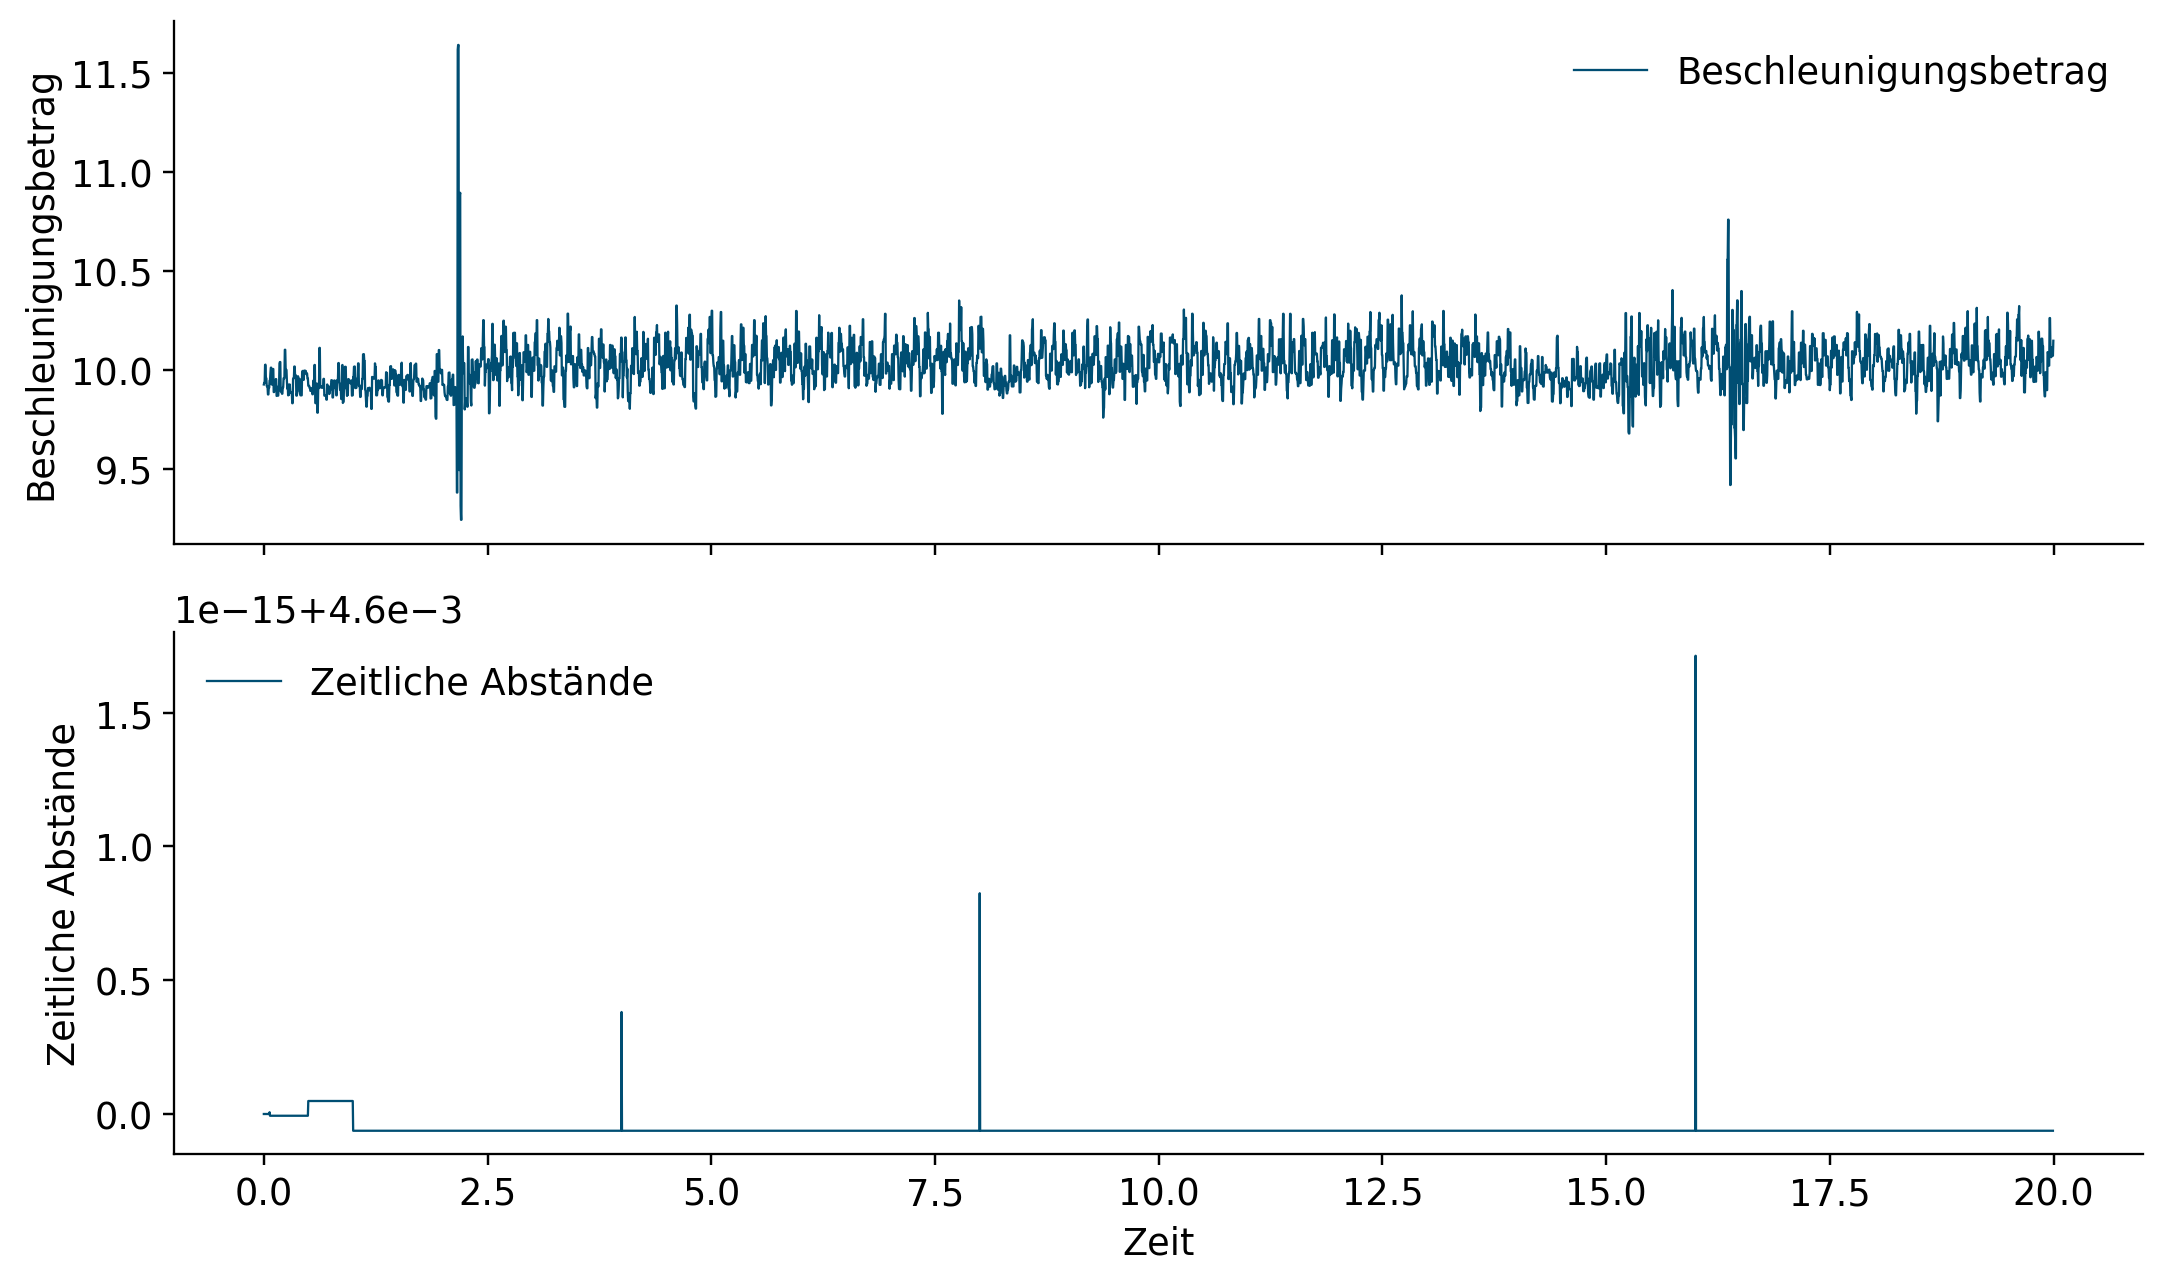

In [27]:
# Berechne die zeitlichen Abstände zwischen den Messpunkten
time_diff = np.diff(timestamp)

# Erstelle zwei Subplots (Betrag der Beschleunigung und zeitliche Abstände)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plot für den Betrag der Beschleunigung
ax1.plot(timestamp, betrag_der_vektoren, label='Beschleunigungsbetrag')
ax1.set_ylabel('Beschleunigungsbetrag')
ax1.legend()

# Plot für die zeitlichen Abstände
ax2.plot(timestamp[:-1], time_diff, label='Zeitliche Abstände')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Zeitliche Abstände')
ax2.legend()

plt.tight_layout()
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [28]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
interpt, interpdata = interpolation(timestamp, betrag_der_vektoren)


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

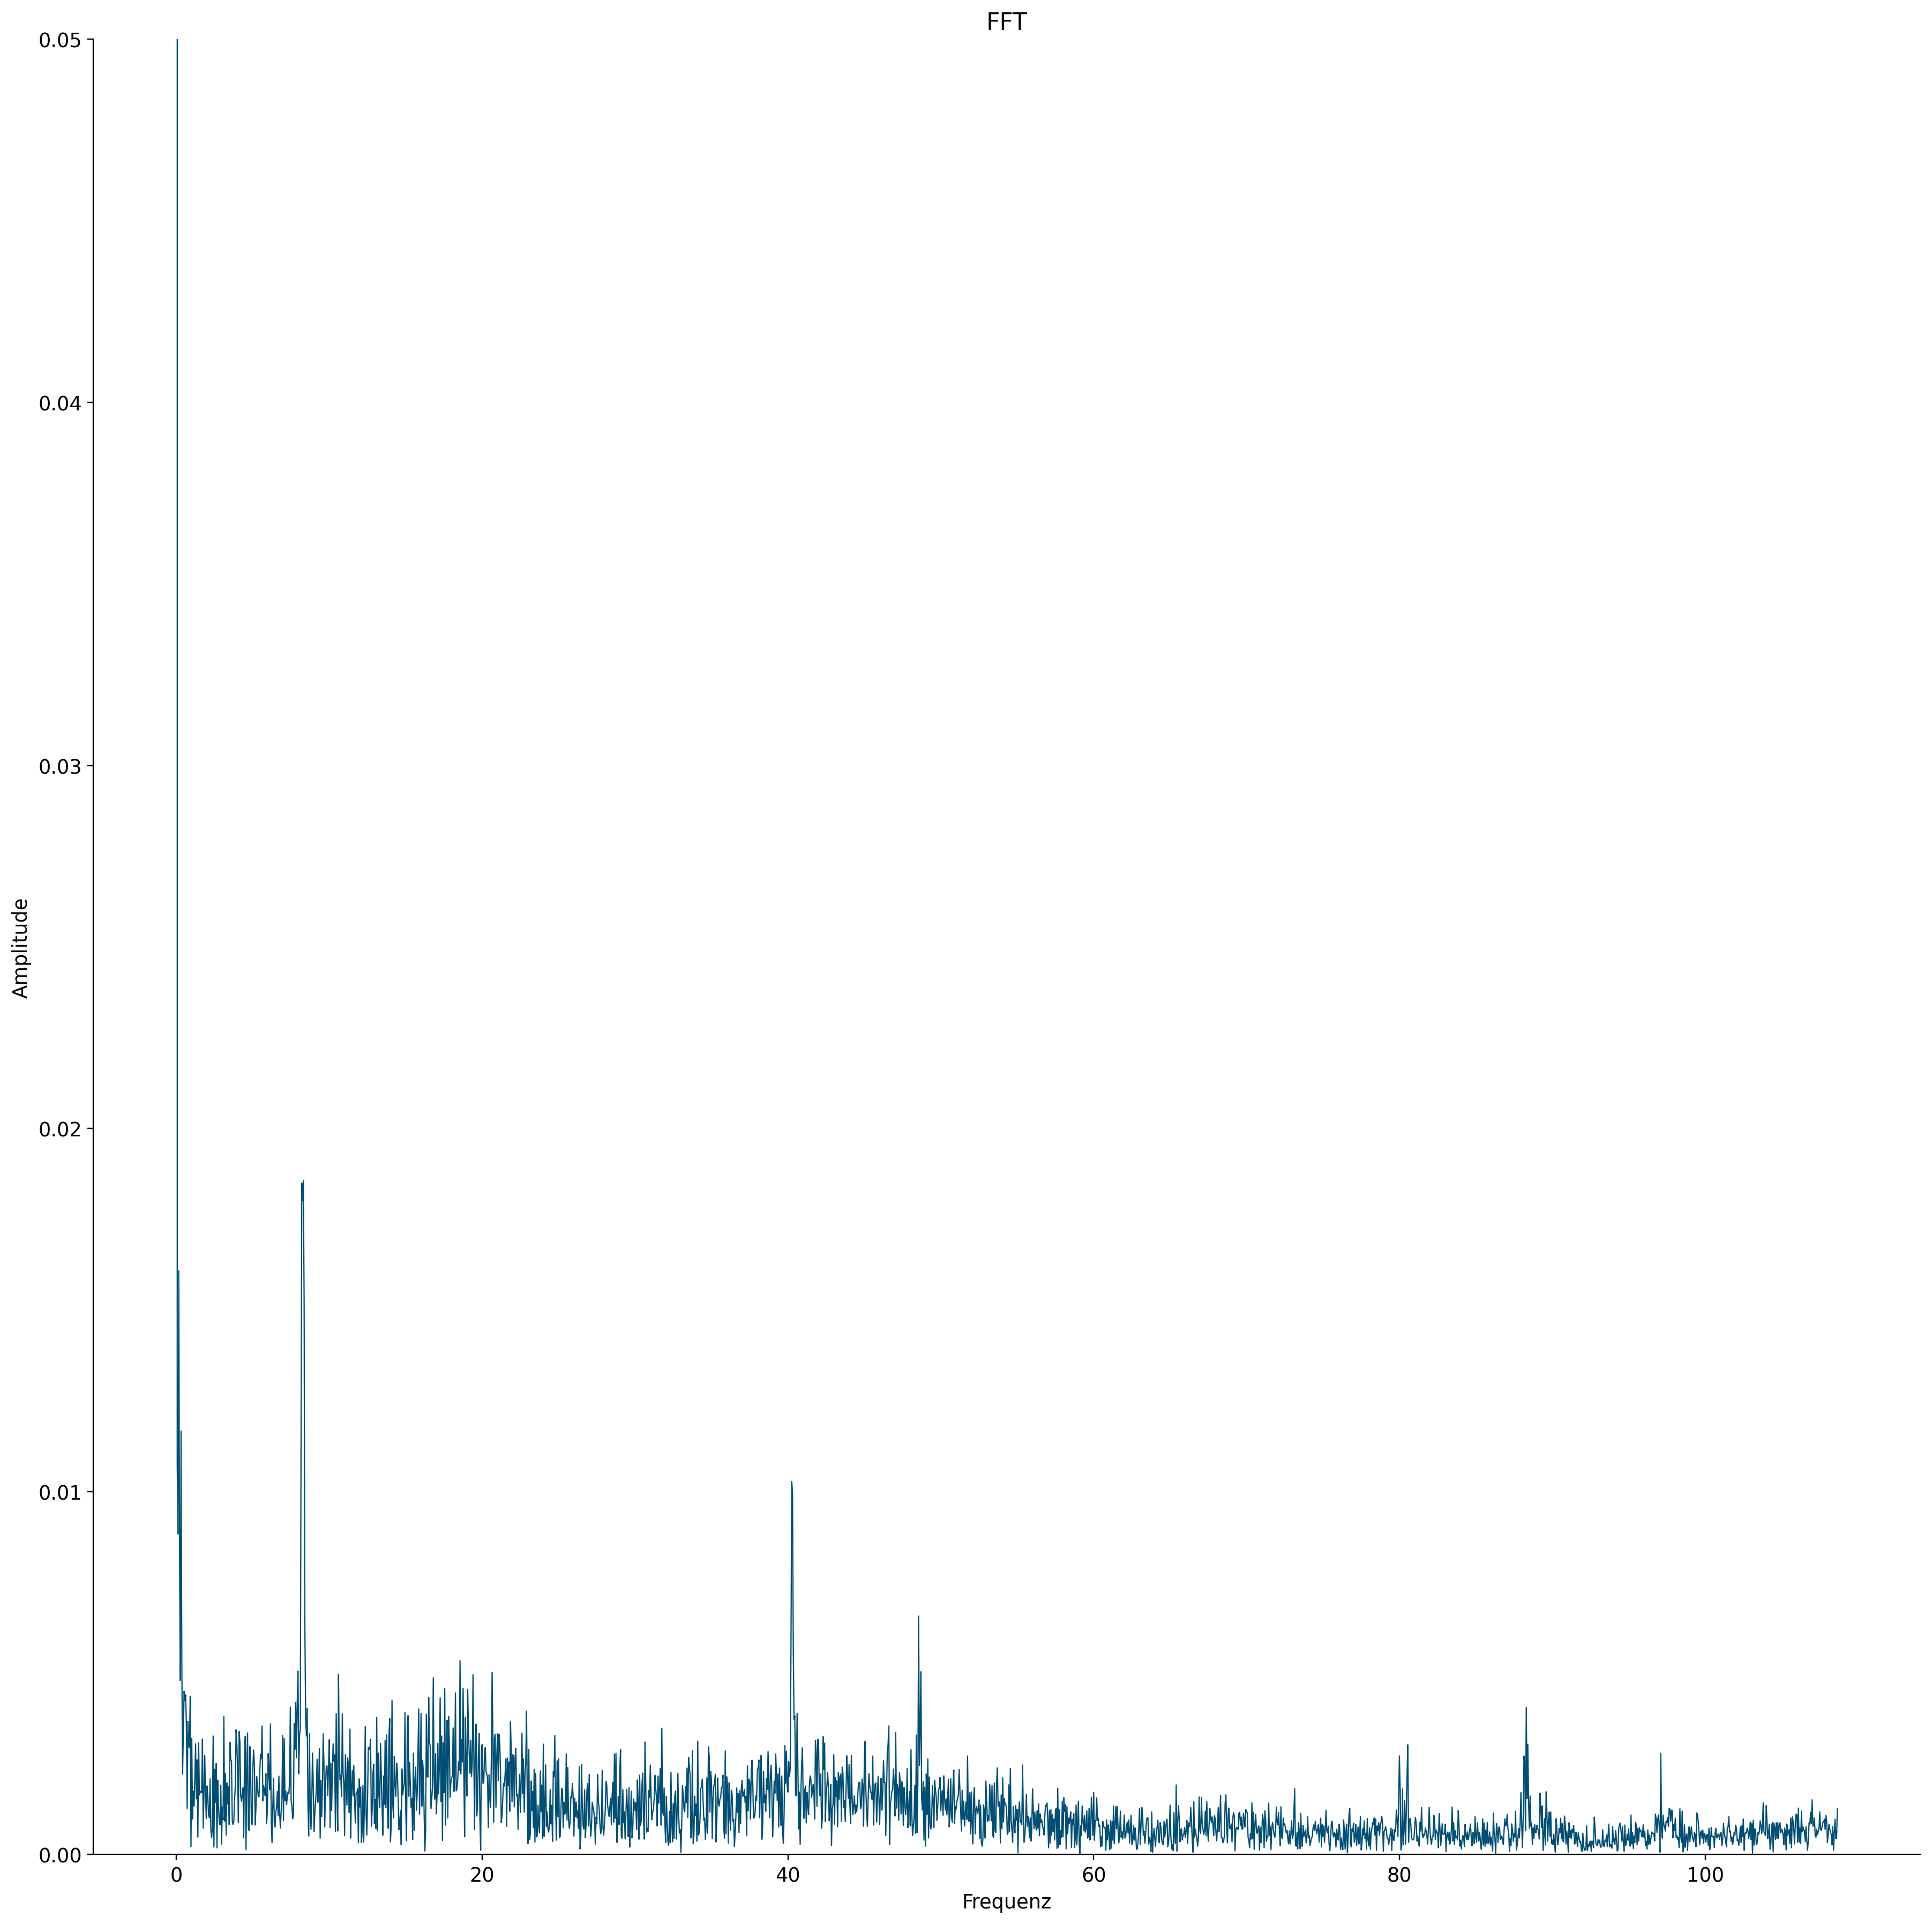

In [29]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results


amplitude, frequenz = my_fft(interpdata, interpt) 

#plot
plt.figure(figsize=(20, 20)) 
plt.ylim(0, 0.05)  
plt.plot(frequenz, amplitude)
plt.xlabel('Frequenz') 
plt.ylabel('Amplitude') 
plt.title('FFT') 
plt.show()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="datasheets/Kopfhoerer.jpg" width="500">

- Beschreibung des Aufbaus: Ich habe den Beschleunigungssensor mit einem Tesafilmband auf dem Kopfhörer befestigt.
- Vorgangsbeschreibung: Nachdem der Sensor befestigt wurde habe ich den Kopfhörer mit meinem Macbook verbunden und ein Lied abgespielt. Während das Lied abgespielt wurde startete ich das Programm auf dem Raspberry Pi.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [30]:
path_measurement_folder = 'measurement_data/data_20231219_100155_YourNameWithoutWhiteSpaces_kopfhörer' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20231219_100155_YourNameWithoutWhiteSpaces_kopfhörer.h5' # replace None by the filename of the hdf5-file

(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231219_100155_YourNameWithoutWhiteSpaces_kopfh\u00f6rer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231219_100155_YourNameWithoutWhiteSpaces_kopfh\u00f6rer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231219_100155_YourNameWithoutWhiteSpaces_kopfh\u00f6rer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "7b3e8220-9e4c-11ee-8c90-0242ac120002": {
    "type": "probe",
    "na

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [31]:
import h5py as h5
with h5.File('measurement_data/data_20231219_100155_YourNameWithoutWhiteSpaces_kopfhörer/data_20231219_100155_YourNameWithoutWhiteSpaces_kopfhörer.h5', "r") as f:
    acceleration_x = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration x/X-Werte"])
    acceleration_y = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration y/Y-Werte"])
    acceleration_z = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration z/Z-Werte"]) 
    timestamp = np.array(f["Raw Data/1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp/Zeitwerte"]) 


#### 2. Betrag der Beschleunigung berechnen


In [32]:
betrag_der_vektoren = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)
print(betrag_der_vektoren)

[10.06053321 10.07405991 10.07398354 ... 10.10996652  9.99924429
 10.02322148]


#### 3. Darstellung der Messdaten

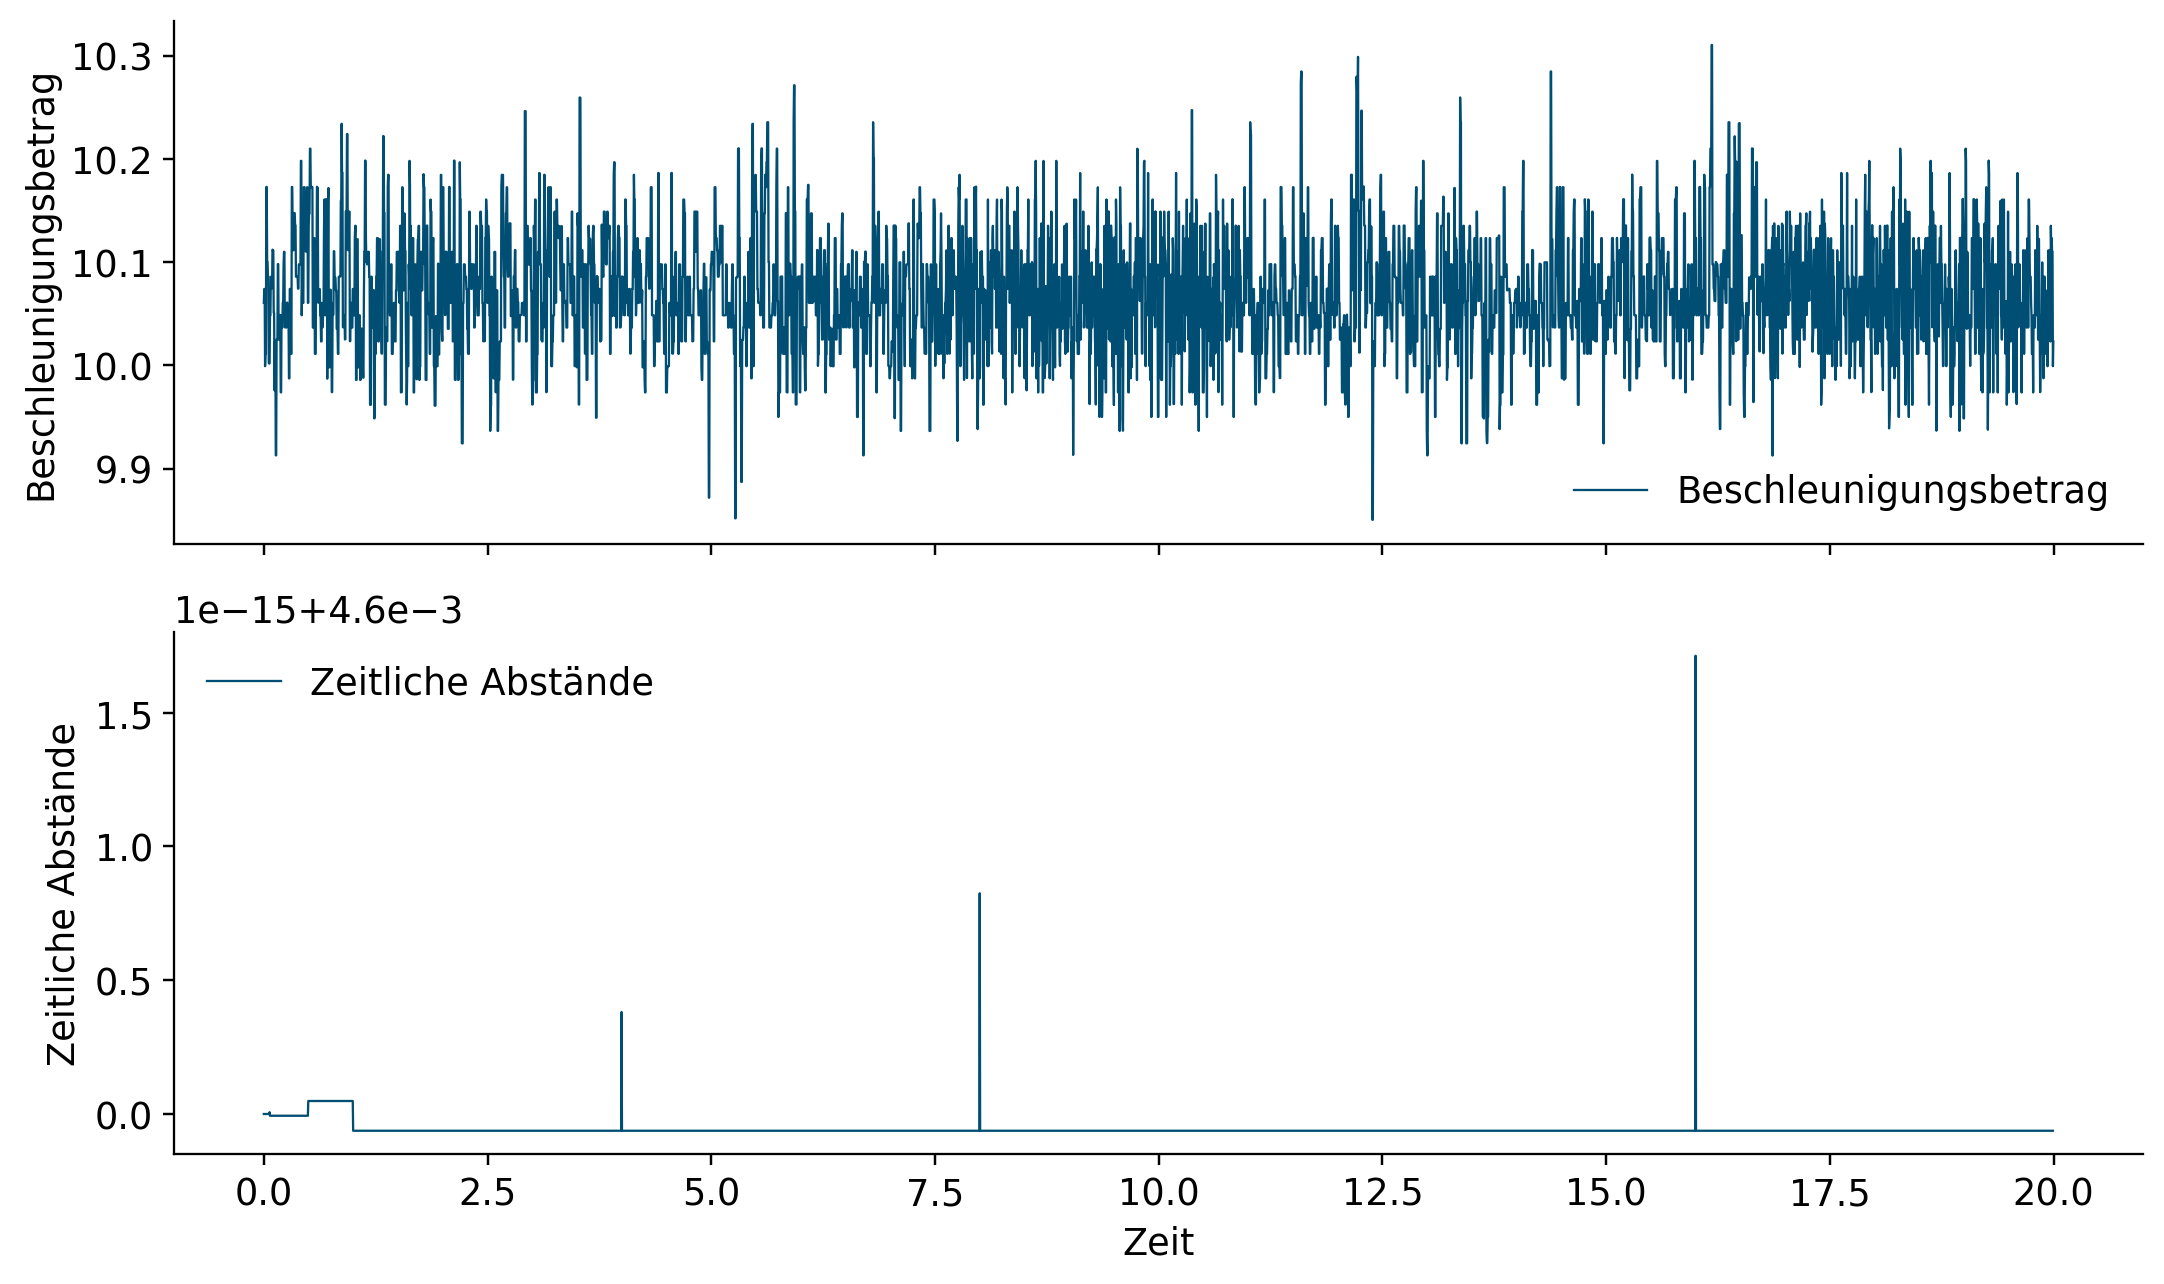

In [33]:
# Berechne die zeitlichen Abstände zwischen den Messpunkten
time_diff = np.diff(timestamp)

# Erstelle zwei Subplots (Betrag der Beschleunigung und zeitliche Abstände)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plot für den Betrag der Beschleunigung
ax1.plot(timestamp, betrag_der_vektoren, label='Beschleunigungsbetrag')
ax1.set_ylabel('Beschleunigungsbetrag')
ax1.legend()

# Plot für die zeitlichen Abstände
ax2.plot(timestamp[:-1], time_diff, label='Zeitliche Abstände')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Zeitliche Abstände')
ax2.legend()

plt.tight_layout()
plt.show()

#### 4. Interpolation der Messwerte



In [36]:
interpt, interpdata = interpolation(timestamp, betrag_der_vektoren)


#### 5 & 6. FFT durchführen und graphisch darstellen


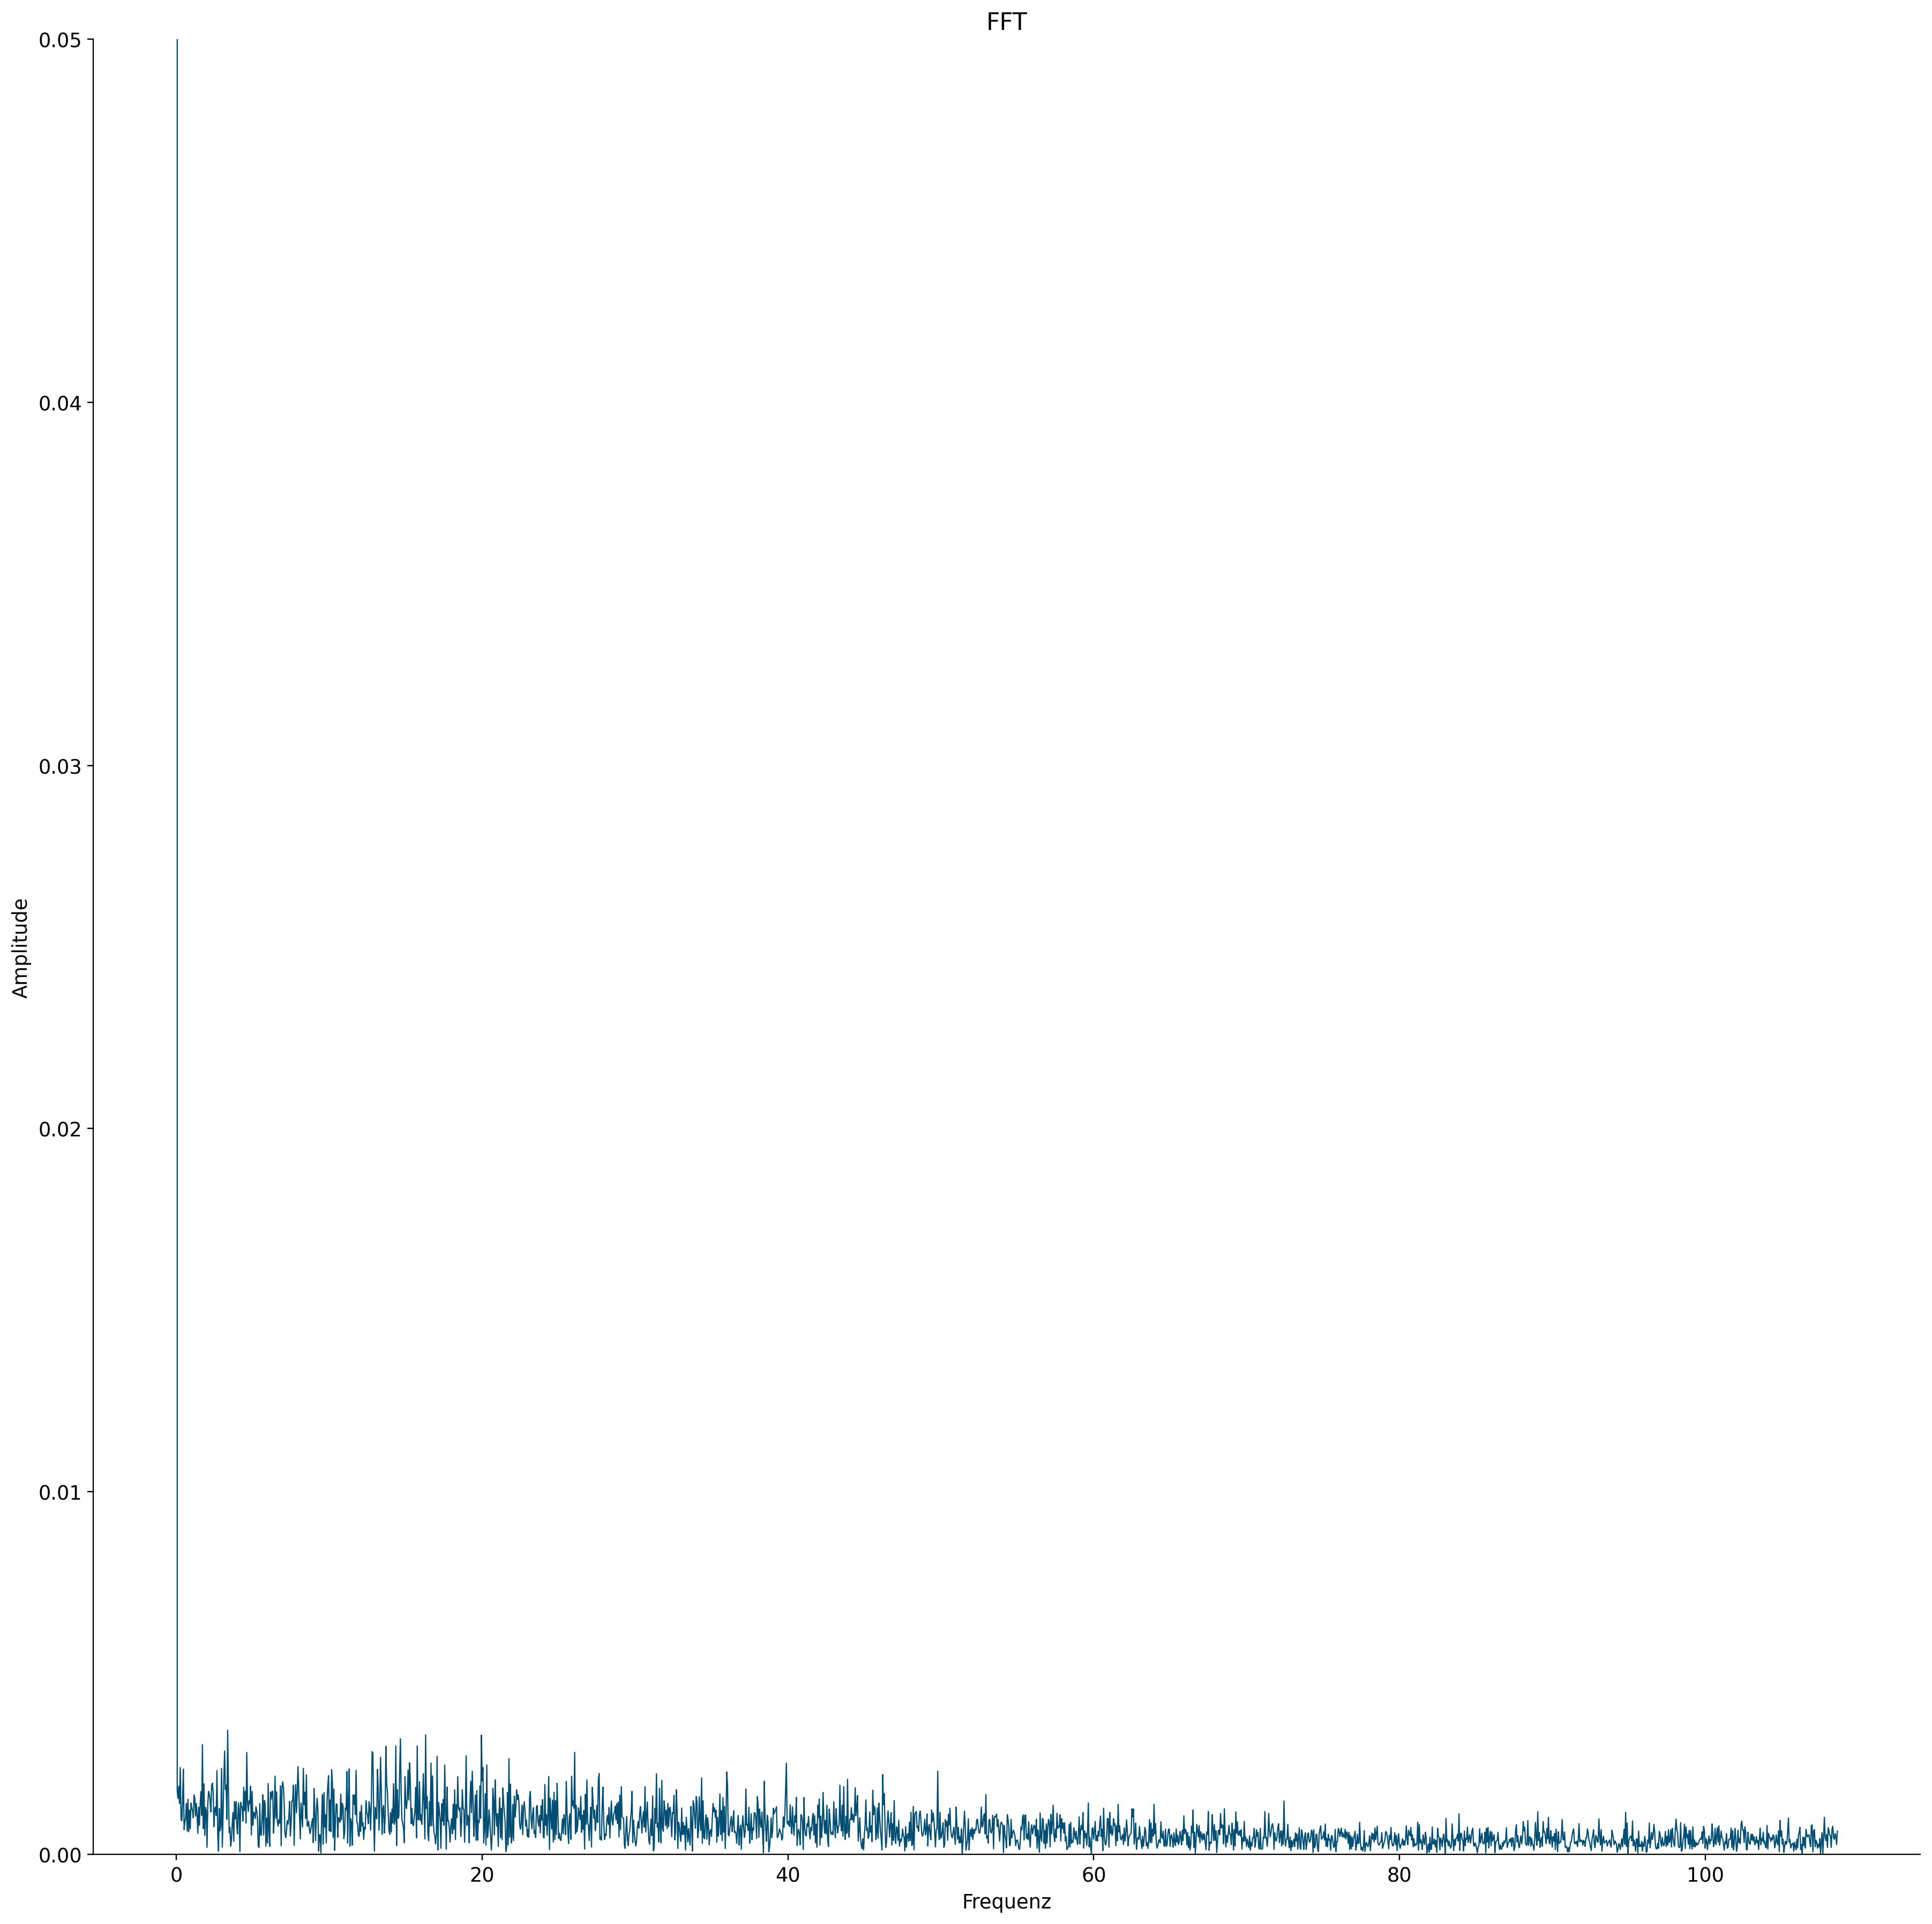

In [37]:
amplitude, frequenz = my_fft(interpdata, interpt) 
# Plot the results
plt.figure(figsize=(20, 20)) 
plt.ylim(0, 0.05)  
plt.plot(frequenz, amplitude)
plt.xlabel('Frequenz') 
plt.ylabel('Amplitude') 
plt.title('FFT') 
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Sowohl bei der Vibration des Handys aus auch bei der des Kophörers kann man erkennen, dass die Frequenz gegen ende des Versuchs immer kleiner wird und gegen 0 strebt. Die Vibration des Handys ist größer als die des Kopfhörers. Bei beiden Verläufen ist ein Großer Sprung am Anfang zu erkennen. Dies ist wahrscheinlich dem Beschleunigungssensor zuzuschreiben.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Ich kenne mich jetzt sehr gut mit HDF5 dateien aus und komme immer besser mit der Verarbeitung der Daten zurecht. Der Versuch ist in vielen Mechanischen Anwendungen von großer Bedeutung, beispielsweise kann man so auch die Unwucht von Reifen Prüfen. Somit hat mir diese Lerneinheit auch einen Nutzen für Praktische Anweundungen gegeben.